# Import libraries


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Load the training dataset


In [4]:
dataset_train=pd.read_csv("C:\\Users\\Priyanka\\Downloads\\Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Use the Open Stock Price Column to Train Your Model.

In [6]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


# Normalizing the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
print(scaled_training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


# Creating X_train and y_train data structure# 

In [8]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


# Reshape the data

In [9]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

# Building the model by Importing the crucial Libraries and Adding Different layers to LSTM

In [10]:


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

# Fitting the model

In [12]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 20s 180ms/step - loss: 0.0384
Epoch 2/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0040
Epoch 13/100

# Extracting the actual stock prices of Jan-2017

In [13]:
dataset_test=pd.read_csv("C:\\Users\\Priyanka\\Downloads\\Google_Stock_Price_Test.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values
print("done")

done


# Preparing the input for the model

In [14]:
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

# Predicting the Values for Jan 2017 Stock Prices

In [15]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


# Plotting the Actual and Predicted Prices for Google Stocks

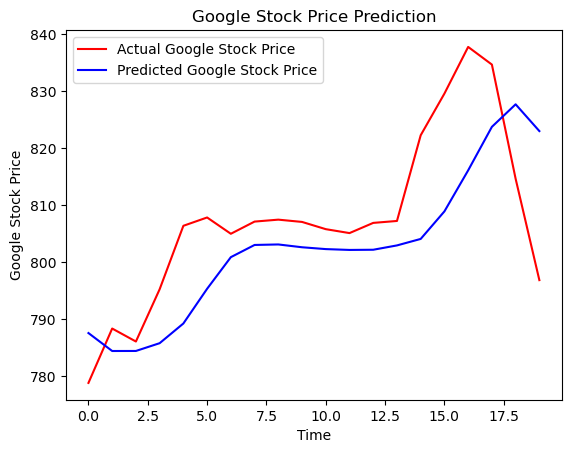

In [16]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()